# Scraping Advanced Stats

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup



Scrape Brunson's Advanced Stats per season from basketball reference

In [2]:
def get_adv_stats(url, table_id):
    
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        stats_table = soup.find('table', {'id': table_id})
        if stats_table is None:
            print(f"Table with ID '{table_id}' not found.")
            return pd.DataFrame()

        # Moved this line outside the if block
        season_stats = pd.read_html(str(stats_table))[0]

        return season_stats
    
    except Exception as e:
        print(f"Error retrieving 23-24 season data:", e)
        return pd.DataFrame()

url = f"https://www.basketball-reference.com/players/b/brunsja01.html#all_advanced"
table_id = "advanced"
adv_stats = get_adv_stats(url, table_id)

adv_stats


/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_5475/390469538.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  season_stats = pd.read_html(str(stats_table))[0]


,Season,Age,Team,Lg,Pos,G,GS,MP,PER,TS%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards
0,2018-19,22,DAL,NBA,PG,73.0,38.0,1591.0,12.7,0.549,...,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,NaN
1,2019-20,23,DAL,NBA,PG,57.0,16.0,1022.0,14.9,0.553,...,20.4,1.6,0.6,2.1,0.101,0.1,-1.0,-0.9,0.3,NaN
2,2020-21,24,DAL,NBA,PG,68.0,12.0,1697.0,17.1,0.618,...,20.2,3.9,1.1,5.1,0.143,1.5,-0.6,0.9,1.2,6MOY-4
3,2021-22,25,DAL,NBA,SG,79.0,61.0,2524.0,17.1,0.583,...,21.9,4.9,2.7,7.5,0.143,0.9,0.0,0.9,1.9,NaN
4,2022-23,26,NYK,NBA,PG,68.0,68.0,2379.0,21.2,0.597,...,27.2,6.9,1.8,8.7,0.175,4.4,-0.5,3.9,3.5,"MVP-12,CPOY-4"
5,2023-24,27,NYK,NBA,PG,77.0,77.0,2726.0,23.4,0.592,...,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4,"MVP-5,CPOY-5,AS,NBA2"
6,2024-25,28,NYK,NBA,PG,9.0,9.0,311.0,21.6,0.582,...,30.0,1.0,0.0,1.0,0.160,4.0,-2.4,1.7,0.3,NaN
7,7 Yrs,7 Yrs,7 Yrs,7 Yrs,NaN,431.0,281.0,12250.0,18.7,0.587,...,24.7,28.6,9.6,38.2,0.150,2.6,-0.5,2.1,12.7,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,DAL (4 Yrs),DAL (4 Yrs),DAL (4 Yrs),DAL (4 Yrs),NaN,277.0,127.0,6834.0,15.8,0.580,...,20.6,11.9,5.4,17.3,0.121,0.4,-0.4,0.0,3.5,NaN


## Cleaning the data

Getting rid of unnecessary columns and rows to prepare for joining with the combined stats dataframe


In [3]:
adv_stats.drop(columns=['Awards', 'Lg', 'Age'], inplace=True)
adv_stats.drop(index=[7,8,9,10], inplace=True)
adv_stats


,Season,Team,Pos,G,GS,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,2018-19,DAL,PG,73.0,38.0,1591.0,12.7,0.549,0.320,0.212,...,12.5,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1
1,2019-20,DAL,PG,57.0,16.0,1022.0,14.9,0.553,0.309,0.193,...,13.6,20.4,1.6,0.6,2.1,0.101,0.1,-1.0,-0.9,0.3
2,2020-21,DAL,PG,68.0,12.0,1697.0,17.1,0.618,0.319,0.241,...,10.3,20.2,3.9,1.1,5.1,0.143,1.5,-0.6,0.9,1.2
3,2021-22,DAL,SG,79.0,61.0,2524.0,17.1,0.583,0.250,0.211,...,10.1,21.9,4.9,2.7,7.5,0.143,0.9,0.0,0.9,1.9
4,2022-23,NYK,PG,68.0,68.0,2379.0,21.2,0.597,0.269,0.328,...,9.4,27.2,6.9,1.8,8.7,0.175,4.4,-0.5,3.9,3.5
5,2023-24,NYK,PG,77.0,77.0,2726.0,23.4,0.592,0.319,0.302,...,9.1,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4
6,2024-25,NYK,PG,9.0,9.0,311.0,21.6,0.582,0.282,0.312,...,7.6,30.0,1.0,0.0,1.0,0.160,4.0,-2.4,1.7,0.3


In [4]:
adv_stats.reset_index(drop=True, inplace=True)
adv_stats


,Season,Team,Pos,G,GS,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,2018-19,DAL,PG,73.0,38.0,1591.0,12.7,0.549,0.320,0.212,...,12.5,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1
1,2019-20,DAL,PG,57.0,16.0,1022.0,14.9,0.553,0.309,0.193,...,13.6,20.4,1.6,0.6,2.1,0.101,0.1,-1.0,-0.9,0.3
2,2020-21,DAL,PG,68.0,12.0,1697.0,17.1,0.618,0.319,0.241,...,10.3,20.2,3.9,1.1,5.1,0.143,1.5,-0.6,0.9,1.2
3,2021-22,DAL,SG,79.0,61.0,2524.0,17.1,0.583,0.250,0.211,...,10.1,21.9,4.9,2.7,7.5,0.143,0.9,0.0,0.9,1.9
4,2022-23,NYK,PG,68.0,68.0,2379.0,21.2,0.597,0.269,0.328,...,9.4,27.2,6.9,1.8,8.7,0.175,4.4,-0.5,3.9,3.5
5,2023-24,NYK,PG,77.0,77.0,2726.0,23.4,0.592,0.319,0.302,...,9.1,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4
6,2024-25,NYK,PG,9.0,9.0,311.0,21.6,0.582,0.282,0.312,...,7.6,30.0,1.0,0.0,1.0,0.160,4.0,-2.4,1.7,0.3


In [5]:
# Columns
adv_stats.rename(columns={'G': 'Tot_Games_Sn', 'GS': 'Games_Started', 'VORP':'ValORP'}, inplace=True)

adv_stats.drop(columns=['Pos'], inplace=True)


In [6]:
adv_stats.corr(numeric_only=True)

,Tot_Games_Sn,Games_Started,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,ValORP
Tot_Games_Sn,1.000000,0.635903,0.859674,-0.269846,0.071915,0.115532,-0.353487,0.397757,0.493073,0.497331,...,0.415287,-0.337968,0.571012,0.784761,0.647949,-0.066032,-0.188786,0.988305,0.082265,0.451925
Games_Started,0.635903,1.000000,0.892226,0.401551,0.135170,-0.295162,0.319633,-0.010266,-0.210140,-0.218673,...,-0.209226,0.408028,0.852111,0.880309,0.887105,0.494259,0.449968,0.661279,0.641880,0.838049
MP,0.859674,0.892226,1.000000,0.223002,0.348413,-0.164542,0.097473,0.126445,0.227846,0.201385,...,-0.070576,0.129842,0.876049,0.961925,0.929520,0.413349,0.277741,0.882255,0.528657,0.790159
PER,-0.269846,0.401551,0.223002,1.000000,0.586246,-0.238278,0.892166,-0.395525,-0.439732,-0.485612,...,-0.853008,0.950424,0.634682,0.236954,0.554283,0.964886,0.987786,-0.251683,0.933688,0.723646
TS%,0.071915,0.135170,0.348413,0.586246,1.000000,-0.135519,0.521128,-0.312903,0.310718,0.220417,...,-0.647479,0.332167,0.554023,0.301649,0.515813,0.726270,0.564537,0.109439,0.607875,0.482074
3PAr,0.115532,-0.295162,-0.164542,-0.238278,-0.135519,1.000000,-0.191446,0.092095,0.134002,0.141138,...,0.399313,-0.140192,-0.119090,-0.331327,-0.165498,-0.276778,-0.120900,-0.030130,-0.141032,-0.061353
FTr,-0.353487,0.319633,0.097473,0.892166,0.521128,-0.191446,1.000000,-0.598949,-0.630860,-0.674870,...,-0.827905,0.863947,0.485831,0.032585,0.391984,0.813517,0.892917,-0.344950,0.812958,0.570220
ORB%,0.397757,-0.010266,0.126445,-0.395525,-0.312903,0.092095,-0.598949,1.000000,0.530630,0.640162,...,0.737111,-0.436424,0.005263,0.137793,0.026746,-0.318514,-0.358004,0.374947,-0.263102,-0.042480
DRB%,0.493073,-0.210140,0.227846,-0.439732,0.310718,0.134002,-0.630860,0.530630,1.000000,0.989775,...,0.412657,-0.645042,0.015939,0.235564,0.071902,-0.226765,-0.443995,0.505054,-0.310025,-0.137815
TRB%,0.497331,-0.218673,0.201385,-0.485612,0.220417,0.141138,-0.674870,0.640162,0.989775,1.000000,...,0.508605,-0.678643,-0.014252,0.204846,0.038859,-0.283727,-0.483585,0.503901,-0.351070,-0.163105


In [7]:
adv_stats

,Season,Team,Tot_Games_Sn,Games_Started,MP,PER,TS%,3PAr,FTr,ORB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,ValORP
0,2018-19,DAL,73.0,38.0,1591.0,12.7,0.549,0.320,0.212,1.7,...,12.5,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1
1,2019-20,DAL,57.0,16.0,1022.0,14.9,0.553,0.309,0.193,2.3,...,13.6,20.4,1.6,0.6,2.1,0.101,0.1,-1.0,-0.9,0.3
2,2020-21,DAL,68.0,12.0,1697.0,17.1,0.618,0.319,0.241,1.8,...,10.3,20.2,3.9,1.1,5.1,0.143,1.5,-0.6,0.9,1.2
3,2021-22,DAL,79.0,61.0,2524.0,17.1,0.583,0.250,0.211,1.9,...,10.1,21.9,4.9,2.7,7.5,0.143,0.9,0.0,0.9,1.9
4,2022-23,NYK,68.0,68.0,2379.0,21.2,0.597,0.269,0.328,1.8,...,9.4,27.2,6.9,1.8,8.7,0.175,4.4,-0.5,3.9,3.5
5,2023-24,NYK,77.0,77.0,2726.0,23.4,0.592,0.319,0.302,1.8,...,9.1,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4
6,2024-25,NYK,9.0,9.0,311.0,21.6,0.582,0.282,0.312,1.5,...,7.6,30.0,1.0,0.0,1.0,0.160,4.0,-2.4,1.7,0.3


In [8]:
adv_stats.to_csv('adv_stats.csv', index=False)


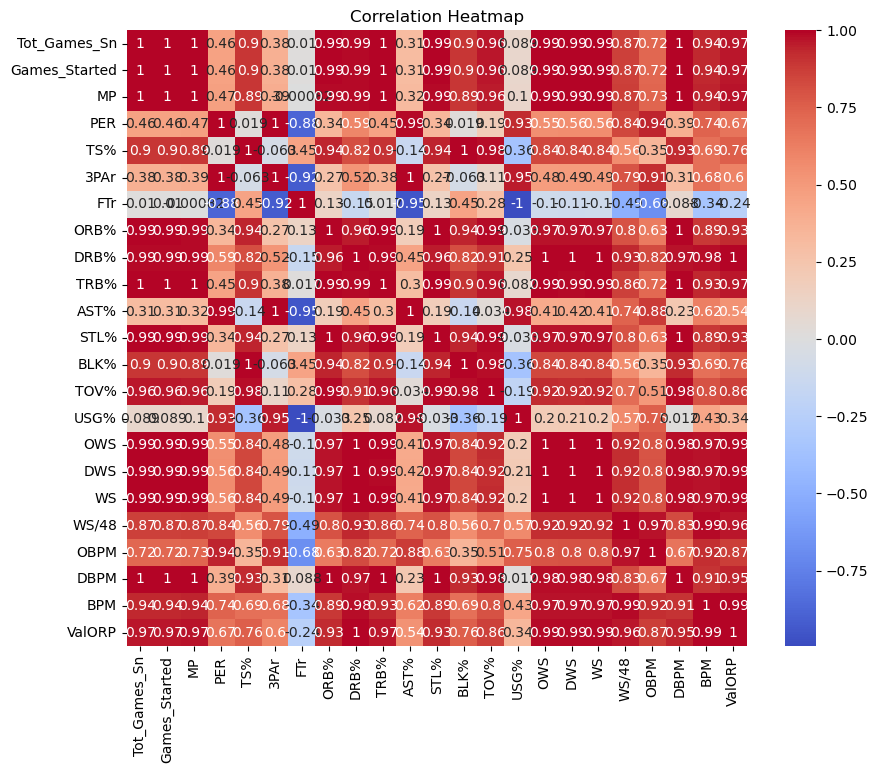

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(adv_stats.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
def get_season_totals(url, table_id):
    
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        stats_table = soup.find('table', {'id': table_id})
        if stats_table is None:
            print(f"Table with ID '{table_id}' not found.")
            return pd.DataFrame()

        # Moved this line outside the if block
        season_stats = pd.read_html(str(stats_table))[0]

        return season_stats
    
    except Exception as e:
        print(f"Error retrieving 23-24 season data:", e)
        return pd.DataFrame()

url = f"https://www.basketball-reference.com/players/b/brunsja01.html#all_advanced"
table_id = "totals"
season_totals = get_season_totals(url, table_id)

season_totals


/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_6611/3840526019.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  season_stats = pd.read_html(str(stats_table))[0]


,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2018-19,22.0,DAL,NBA,PG,73.0,38.0,1591.0,264.0,565.0,...,0.725,25.0,144.0,169.0,230.0,37.0,4.0,88.0,127.0,678.0
1,2019-20,23.0,DAL,NBA,PG,57.0,16.0,1022.0,181.0,388.0,...,0.813,22.0,112.0,134.0,188.0,22.0,4.0,66.0,74.0,466.0
2,2020-21,24.0,DAL,NBA,PG,68.0,12.0,1697.0,328.0,627.0,...,0.795,27.0,204.0,231.0,239.0,35.0,1.0,80.0,109.0,857.0
3,2021-22,25.0,DAL,NBA,SG,79.0,61.0,2524.0,506.0,1008.0,...,0.840,43.0,266.0,309.0,377.0,66.0,3.0,124.0,151.0,1285.0
4,2022-23,26.0,NYK,NBA,PG,68.0,68.0,2379.0,587.0,1195.0,...,0.829,40.0,201.0,241.0,421.0,61.0,15.0,142.0,152.0,1633.0
5,2023-24,27.0,NYK,NBA,PG,77.0,77.0,2726.0,790.0,1648.0,...,0.847,43.0,235.0,278.0,519.0,70.0,13.0,186.0,144.0,2212.0
6,2024-25,28.0,NYK,NBA,PG,8.0,8.0,270.0,70.0,153.0,...,0.805,4.0,16.0,20.0,49.0,4.0,0.0,13.0,15.0,192.0
7,Career,NaN,NaN,NBA,NaN,430.0,280.0,12209.0,2726.0,5584.0,...,0.823,204.0,1178.0,1382.0,2023.0,295.0,40.0,699.0,772.0,7323.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4 seasons,NaN,DAL,NBA,NaN,277.0,127.0,6834.0,1279.0,2588.0,...,0.800,117.0,726.0,843.0,1034.0,160.0,12.0,358.0,461.0,3286.0
